In [132]:
import pandas as pd
import numpy as np
import pandas_datareader.data as wb

In [133]:
#importando dados

In [134]:
ativo = wb.get_data_yahoo('PETR4.SA', start=2000)
ganho = 20
perda = ganho/2
ativo['MM10'] = ativo['Close'].rolling(10).mean()
ativo['MM20'] = ativo['Close'].rolling(20).mean()
ativo['MM100'] = ativo['Close'].rolling(100).mean()
ativo['MM200'] = ativo['Close'].rolling(200).mean()
ativo

,High,Low,Open,Close,Volume,Adj Close,MM10,MM20,MM100,MM200
Date,,,,,,,,,,
2000-01-03,5.875,5.875000,5.875000,5.875000,3.538944e+10,4.050103,NaN,NaN,NaN,NaN
2000-01-04,5.550,5.550000,5.550000,5.550000,2.886144e+10,3.826055,NaN,NaN,NaN,NaN
2000-01-05,5.494,5.494000,5.494000,5.494000,4.303360e+10,3.787450,NaN,NaN,NaN,NaN
2000-01-06,5.475,5.475000,5.475000,5.475000,3.405568e+10,3.774351,NaN,NaN,NaN,NaN
2000-01-07,5.500,5.500000,5.500000,5.500000,2.091264e+10,3.791586,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-12-23,28.250,27.350000,27.430000,27.950001,4.903890e+07,27.950001,27.763,27.0200,22.6906,20.74220
2020-12-28,28.520,28.180000,28.360001,28.180000,3.631330e+07,28.180000,27.799,27.1380,22.7504,20.80285
2020-12-29,28.430,27.990000,28.379999,28.270000,2.989110e+07,28.270000,27.885,27.2570,22.8151,20.85640


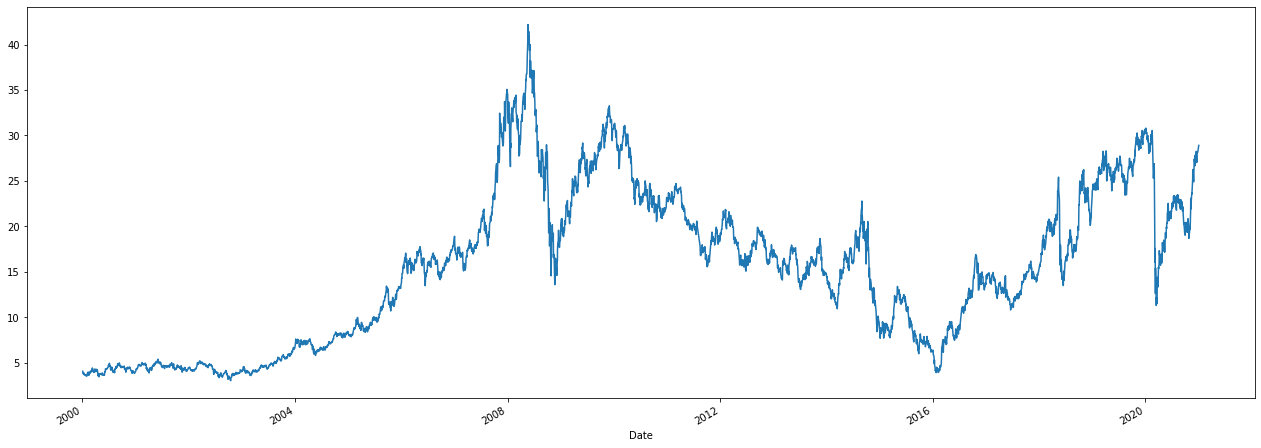

In [135]:
ativo['Adj Close'].plot(figsize=(22,8))

In [136]:
resultado = []
for i in range(0, len(ativo)):
#for i in range(0, 100):
  preco = ativo['Close'][i]
  pre_alto = preco*(1+(ganho/100))
  pre_baixo = preco*(1-(perda/100))
  for j in range(i+1, len(ativo)):
  #n = 250
  #for j in range(i+1, n+1):
    if j == len(ativo)-1:
      resultado.append(None)
    elif ativo['Close'][j] >= pre_alto:
      resultado.append(1)
      break
    elif ativo['Close'][j] <= pre_baixo:
      resultado.append(0)
      break
    
print(resultado)
print(len(resultado))
print(f'Gains!: {resultado.count(1)}')
print(f'Loss!: {resultado.count(0)}')
print(f'None: {resultado.count(None)}')

[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [137]:
#resultado.pop(0)
resultado.append(None)
ativo['Resultado'] = resultado
ativo = ativo.dropna()

In [138]:
ativo['MM10'] = ativo['Close'] - ativo['MM10']
ativo['MM20'] = ativo['Close'] - ativo['MM20']
ativo['MM100'] = ativo['Close'] - ativo['MM100']
ativo['MM200'] = ativo['Close'] - ativo['MM200']
ativo

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,High,Low,Open,Close,Volume,Adj Close,MM10,MM20,MM100,MM200,Resultado
Date,,,,,,,,,,,
2000-10-06,6.475000,6.475000,6.475000,6.475000,37315200.0,4.463729,-0.102625,-0.197750,0.124857,0.496744,0.0
2000-10-09,6.487500,6.487500,6.487500,6.487500,26342400.0,4.472348,-0.088875,-0.149625,0.125043,0.506181,0.0
2000-10-10,6.606250,6.606250,6.606250,6.606250,40163200.0,4.554211,0.035500,-0.007375,0.230980,0.619650,0.0
2000-10-11,6.625000,6.625000,6.625000,6.625000,30969600.0,4.567138,0.056750,0.030125,0.235860,0.632745,0.0
2000-10-12,6.625000,6.625000,6.625000,6.625000,0.0,4.567138,0.055500,0.035750,0.222740,0.626995,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-11,23.360001,22.400000,23.350000,22.879999,93072900.0,22.879999,2.534999,2.682499,1.285599,1.821199,1.0
2020-11-12,22.820000,21.770000,22.740000,21.910000,77275000.0,21.910000,1.241000,1.615500,0.306000,0.889900,1.0
2020-11-13,22.799999,21.889999,22.020000,22.610001,49076500.0,22.610001,1.609001,2.172501,0.996401,1.623351,1.0


In [139]:
previsores = ativo.iloc[:,0:10]
classe = ativo.iloc[:,10]
classe = classe.astype('int')

In [140]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.15, random_state=0)

In [141]:
from sklearn.naive_bayes import GaussianNB
classificador = GaussianNB()
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

In [142]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

In [143]:
print(precisao)
print(matriz)

0.44534412955465585
[[ 41 387]
 [ 24 289]]


In [144]:
# Conclusão: 50,2%